In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import glob
import numpy as np
import os
import re

In [2]:
city = 'Mumbai'

In [3]:
PATH = f'/media/root/data/analysis/data/Order_wise_data/{city}/'

In [4]:
files = [f for f in os.listdir(PATH) if re.match(f'{city}_((July)|(Dec))\.csv', f)]
files

['Mumbai_Dec.csv', 'Mumbai_July.csv']

In [5]:
dfs = []
for i in range(0, len(files)):
    df = pd.read_csv(os.path.join(PATH, files[i]))
    if city == 'Mumbai':
        df = df[pd.notna(df['Delivery_lat']) & (df['Delivery_lat']>18) & (df['Delivery_lat']<21) & (df['Delivery_lng']<75)]
    dfs.append(df)

In [6]:
mini_lat = 4321.0
mini_long = 4321.0
max_lat = 0.0
max_long = 0.0

In [10]:
# l = list(dfs[1].Delivery_lat.unique())
# l.sort()
# l
df = dfs[1].groupby(["Delivery_lng", "Delivery_lat", 'Completion_status']).size().reset_index(name="Time")
df

,Delivery_lng,Delivery_lat,Completion_status,Time
0,72.513674,19.818956,Completed,1
1,72.791349,18.948526,Completed,1
2,72.791698,18.924400,Completed,1
3,72.792017,19.144605,Completed,1
4,72.792110,18.949687,Completed,1
...,...,...,...,...
411131,73.203964,19.196038,Completed,1
411132,73.204058,19.195969,Completed,1
411133,73.219500,20.109824,Completed,1
411134,73.302817,19.071286,Completed,1


In [8]:
dfs[0].groupby(["Delivery_lat", "Delivery_lng"]).size().reset_index(name="Time")

,Delivery_lat,Delivery_lng,Time
0,18.895291,72.809635,2
1,18.895386,72.810387,1
2,18.895390,72.810399,1
3,18.895400,72.810386,1
4,18.895459,72.809895,1
...,...,...,...
189325,19.279965,72.876341,1
189326,19.279996,72.876143,1
189327,19.280008,72.876416,1
189328,19.280009,72.876519,1


In [17]:
a = 0
print()
for df in dfs:
    df2 = df[pd.notna(df['Delivery_lat']) & (df['Delivery_lat']>18) & (df['Delivery_lat']<21) & (df['Delivery_lng']<75)]
    print(list(df2.min())[5:9])
print()
print()
for df in dfs:
    df2 = df[pd.notna(df['Delivery_lat']) & (df['Delivery_lat']>18) & (df['Delivery_lat']<21) & (df['Delivery_lng']<75)]
    print(list(df2.max())[5:9])



[18.91811, 72.80977, 18.8952909, 72.792]


/tmp/ipykernel_244182/841052027.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(list(df2.min())[5:9])


[18.91811, 72.80977, 18.8963353, 72.5136744]


[19.267684, 73.1865, 19.28006839, 73.20492949]
[19.267684, 73.1865, 20.109824, 73.462812]


/tmp/ipykernel_244182/841052027.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(list(df2.max())[5:9])


In [ ]:
mini_lat, mini_long, max_lat, max_long = 18.8952909, 72.5136744, 20.109824, 73.462812

In [15]:
#Delhi
mini_lat, mini_long, max_lat, max_long = 28.119624, 76.878243, 28.752734, 77.565681

In [40]:
mini_lat, mini_long = 16.789445, 42.687846
mini_lat, mini_long

(16.789445, 42.687846)

In [41]:
max_lat, max_long = 19.280068, 77.22981
max_lat, max_long

(19.280068, 77.22981)

In [42]:
link = f"https://overpass-api.de/api/map?bbox={mini_long},{mini_lat},{max_long},{max_lat}"

In [43]:
link

'https://overpass-api.de/api/map?bbox=42.687846,16.789445,77.22981,19.280068'

In [44]:
bbox = f"{mini_long},{mini_lat},{max_long},{max_lat}"

In [45]:
link = "http://overpass-api.de/api/interpreter?data=[timeout:86400][maxsize:1073741824];(node(" + bbox + ");<;);out meta;"

In [46]:
saveLocation = f'/media/root/data/analysis/map/OSMFiles/map_{city}.osm'

In [47]:
print(saveLocation)
link

/media/root/data/analysis/map/OSMFiles/map_Mumbai.osm


'http://overpass-api.de/api/interpreter?data=[timeout:86400][maxsize:1073741824];(node(42.687846,16.789445,77.22981,19.280068);<;);out meta;'

In [29]:
cmd = "sudo wget -O "+saveLocation+" \""+link+"\""

In [30]:
cmd

'sudo wget -O /media/root/data/analysis/map/OSMFiles/map_Delhi.osm "http://overpass-api.de/api/interpreter?data=[timeout:86400][maxsize:1073741824];(node(76.878243,28.119624,77.565681,28.752734);<;);out meta;"'

##### Delhi wget -O ./map_bpl.xml "http://overpass-api.de/api/interpreter?data=[out:xml][timeout:86400][maxsize:1073741824];(node(22.9612675,77.3164983,23.4053184,78.8065779);<;);out meta;"

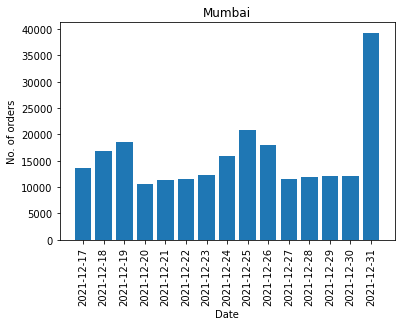

In [63]:
# df12 =  df1.groupby("Order_date").size().reset_index(name="Time")
X, y = [], []
for id,x in df12.iterrows():
    X.append(x['Order_date'])
    y.append(x['Time'])
#     print(x['Order_date'], x['Time'])
plt.bar(X, y)
plt.xticks(X, rotation='vertical')
# plt.autofmt_xdate
plt.xlabel("Date")
plt.ylabel("No. of orders")
plt.title("Mumbai")
plt.show()

In [48]:
df1 = dfs[0]
df2 = dfs[1]
df1

,Store_id,City_name,Order_date,Order_number,Order_Items,Store_lat,Store_lng,Delivery_lat,Delivery_lng,Completion_status
0,dft80003,Mumbai,2021-12-17,39,"{""order_menu"":[{""menu_description"":""SID-Cheesy...",19.15456,72.884480,19.155185,72.886352,Completed
1,dft80003,Mumbai,2021-12-17,33,"{""order_menu"":[{""menu_description"":""PEPSI"",""qu...",19.15456,72.884480,19.153979,72.885503,Completed
2,dft80003,Mumbai,2021-12-17,28,"{""order_menu"":[{""menu_description"":""PEPSI"",""qu...",19.15456,72.884480,19.153826,72.884459,Completed
3,dft80003,Mumbai,2021-12-17,26,"{""order_menu"":[{""menu_description"":""SID-Cheesy...",19.15456,72.884480,19.153987,72.885997,Completed
4,dft80003,Mumbai,2021-12-17,24,"{""order_menu"":[{""menu_description"":""_SV-Marghe...",19.15456,72.884480,19.155245,72.884723,Completed
...,...,...,...,...,...,...,...,...,...,...
236025,dpi67035,Mumbai,2021-12-31,722,"{""order_menu"":[{""menu_description"":""Pepper Bar...",18.97972,73.116479,18.972895,73.109287,Completed
236026,dpi67035,Mumbai,2021-12-31,723,"{""order_menu"":[{""menu_description"":""Moroccan S...",18.97972,73.116479,18.980442,73.118001,Completed
236027,dpi67035,Mumbai,2021-12-31,732,"{""order_menu"":[{""menu_description"":""SID-Cheesy...",18.97972,73.116479,18.991567,73.113834,Partially Completed
236028,dpi67035,Mumbai,2021-12-31,733,"{""order_menu"":[{""menu_description"":""SID-Cheesy...",18.97972,73.116479,18.981853,73.120748,Completed


In [51]:
# df22 =  df2.groupby("Order_date").size().reset_index(name="Time")
df22

,Order_date,Time
0,2022-07-01,15608
1,2022-07-02,18510
2,2022-07-03,18394
3,2022-07-04,11877
4,2022-07-05,13208
5,2022-07-06,12232
6,2022-07-07,12511
7,2022-07-08,13939
8,2022-07-09,16840
9,2022-07-10,17930


In [69]:
df = dfs[1]

In [70]:
df

,Store_id,City_name,Order_date,Order_number,Order_Items,Store_lat,Store_lng,Delivery_lat,Delivery_lng,Completion_status
0,DPI66562,Jaipur,2022-07-04,183,"[{""quantity"": 1, ""menu_code"": ""PIZ0201"", ""volu...",26.964173,75.780800,26.969079,75.766885,delivered
1,DPI65918,Jaipur,2022-07-04,152,"[{""quantity"": 1, ""menu_code"": ""PIZ0201"", ""volu...",26.915651,75.810273,26.908024,75.792935,delivered
2,DPI63886,Jaipur,2022-07-05,121,"[{""quantity"": 1, ""menu_code"": ""PIZ0119"", ""volu...",26.894069,75.748494,26.884650,75.743545,delivered
3,DPI66159,Jaipur,2022-07-07,64,"[{""quantity"": 1, ""menu_code"": ""PIZ0162"", ""volu...",26.912792,75.743534,26.924736,75.754542,delivered
4,DPI67185,Jaipur,2022-07-08,76,"[{""quantity"": 1, ""menu_code"": ""PIZ0191"", ""volu...",26.895394,75.829251,26.904075,75.824101,delivered
...,...,...,...,...,...,...,...,...,...,...
63597,DPI66738,Jaipur,2022-07-30,114,"[{""quantity"": 1, ""menu_code"": ""PIZ0194"", ""volu...",26.947720,75.724203,26.961974,75.740495,delivered
63598,DPI66981,Jaipur,2022-07-29,264,"[{""quantity"": 1, ""menu_code"": ""PIZ0195"", ""volu...",26.890880,75.769141,26.896728,75.777535,delivered
63599,DPI66159,Jaipur,2022-07-30,17,"[{""quantity"": 1, ""menu_code"": ""PIZ0200"", ""volu...",26.912792,75.743534,26.906017,75.736635,delivered
63600,DPI66159,Jaipur,2022-07-30,107,"[{""quantity"": 1, ""menu_code"": ""BEV0119"", ""volu...",26.912792,75.743534,26.915112,75.743042,delivered


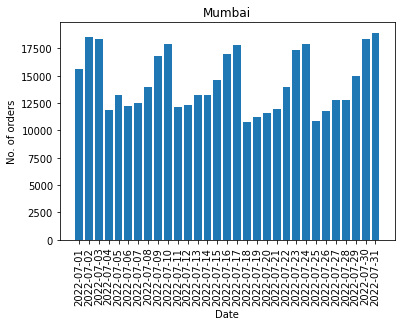

In [62]:
X, y = [], []
for id,x in df22.iterrows():
    X.append(x['Order_date'])
    y.append(x['Time'])
#     print(x['Order_date'], x['Time'])
plt.bar(X, y)
plt.xticks(X, rotation='vertical')
# plt.autofmt_xdate
plt.xlabel("Date")
plt.ylabel("No. of orders")
plt.title("Mumbai")
plt.show()